In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Titanic=sns.load_dataset("titanic")
Titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df_gender=pd.get_dummies(Titanic["sex"])
df_gender.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
Titanic=pd.concat([Titanic,df_gender],axis=1)

In [ ]:
def booltoint(x):
  if x ==True:
    return 1
  if x ==False:
    return 0
Titanic['alone']=Titanic['alone'].map(booltoint)
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,female,male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,1,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,1,0,1


In [ ]:
Titanic['adult_male']=Titanic['adult_male'].map(booltoint)
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,female,male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1,0,1


In [ ]:
df=Titanic[["age","pclass","alone","female","male","survived","sex"]]
df.dropna(axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df.head()

,age,pclass,alone,female,male,survived,sex
0,22.0,3,0,0,1,0,male
1,38.0,1,0,1,0,1,female
2,26.0,3,1,1,0,1,female
3,35.0,1,0,1,0,1,female
4,35.0,3,1,0,1,0,male


Text(0.5, 1.0, 'Total survived by sex')

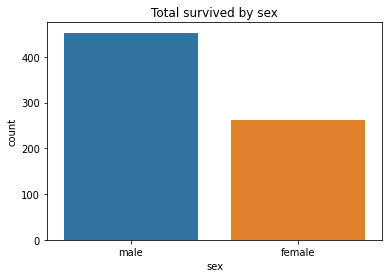

In [ ]:
sns.countplot(x="sex",data=df)
plt.title("Total survived by sex")

Text(0.5, 1.0, 'Total survived by gender')

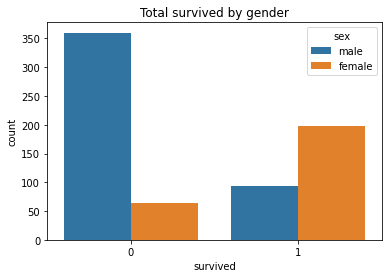

In [ ]:
sns.countplot(x='survived',hue="sex",data=df)
plt.title("Total survived by gender")

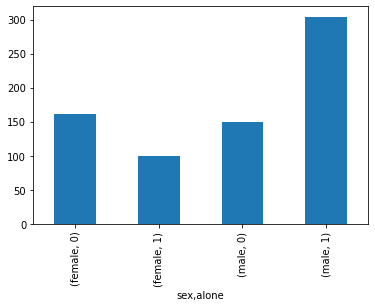

In [ ]:
df.groupby(['sex','alone'])['survived'].count().plot(kind="bar")


Text(0.5, 1.0, 'Survived by gender and alone')

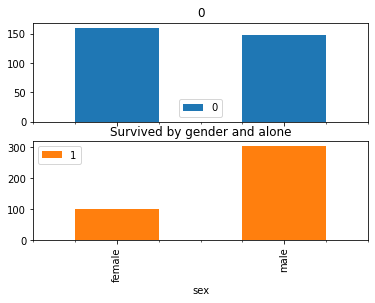

In [ ]:
df.groupby(['sex','alone'])['survived'].count().unstack().plot(kind="bar",subplots=True)
plt.title("Survived by gender and alone")

In [ ]:
import plotly.express as px
fig = px.pie(df, values='alone', names='survived',color='survived',color_discrete_map={0:'red',1:'royalblue'})
fig.show()

# Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x=df.drop(['survived','sex'],axis=1)
y=df['survived']
print(x.shape)
print(y.shape)

(714, 5)
(714,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
logicReg=LogisticRegression()
logicReg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predict=logicReg.predict(x_test)
y_predict

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

# **Accuracy of model**

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logicReg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        82
           1       0.81      0.69      0.74        61

    accuracy                           0.80       143
   macro avg       0.80      0.78      0.79       143
weighted avg       0.80      0.80      0.79       143

